# **Базові моделі популяційної динаміки**
програмування простих моделей через аналітичні рівняння та сіткові функції

як писати Latex формули в Colab -  https://pl.wikibooks.org/wiki/LaTeX/Matematyka

## **Завдання №1**
Оберіть одну модель обмеженого зростання із: моделі Гомпертца,  Ферхюльста, $\cfrac{dy}{dt}= \cfrac {y - y0} {τ}$, $\cfrac{dy}{dt}= \alpha \cdot(y - 1) - \beta \cdot y$, тощо. Визначте адекватні параметри для моделі.

Зведіть у таблицю розв'язки моделі різними методами - аналітичне рішення, чисельне рішення методом Рунге-Кутта, ODEint, solve_ivp.

На перший графік виведіть 4  розв'язки по різним методам.

На другий графік виведіть похибки розв'язків різних методів відносно аналітичного рішення (логарифмічна вісь ***y*** за потреби).

Підпишіть графіки ПІБ, значеннями параметрів, позначками. Створіть окремий текстовий висновок про результати застосування чисельних методів в Вашій роботі.

In [12]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk
from scipy.integrate import odeint, solve_ivp

plt.style.use("cyberpunk")

# **Модель Ферхюльста:**

Для прикладу, розглянемо модель Ферхюльста:
$$
\frac{dy}{dt} = \alpha \cdot (y - 1) - \beta \cdot y
$$

Виберемо довільні значення для параметрів:
\begin{align*}
\(\alpha = 1\) \ \(\beta = 0.5\)
\end{align*}


**Аналітичне рішення**

Для спрощеності, розглянемо аналітичний розв'язок даного диференціального рівняння без виводу. Припустимо, що розв'язок має вигляд:
$$
y(t) = \frac{e^{\alpha t}}{e^{\alpha t} + \frac{\beta}{\alpha}}
$$

**Чисельне рішення методом Рунге-Кутта**

**Рішення за допомогою ODEint**

**Рішення за допомогою solve\_ivp**


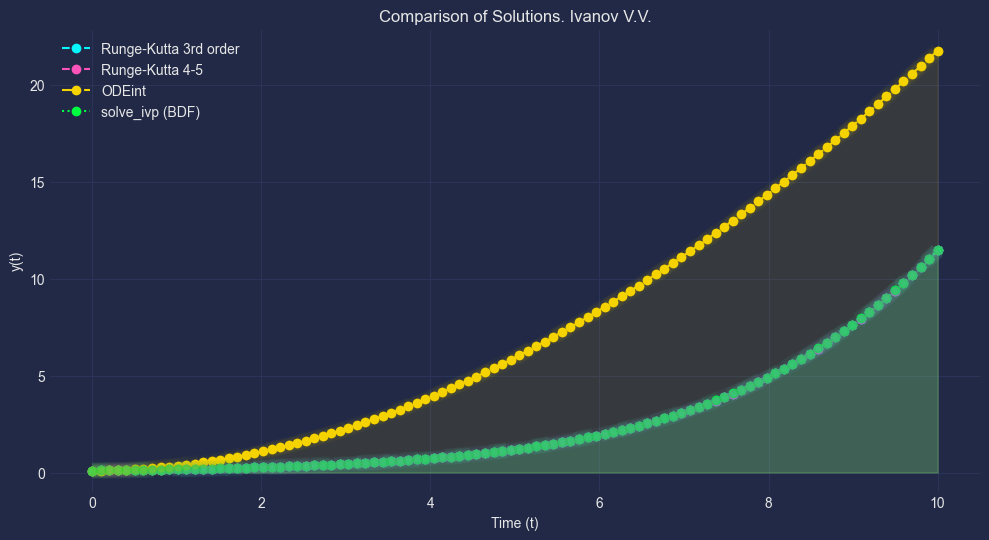

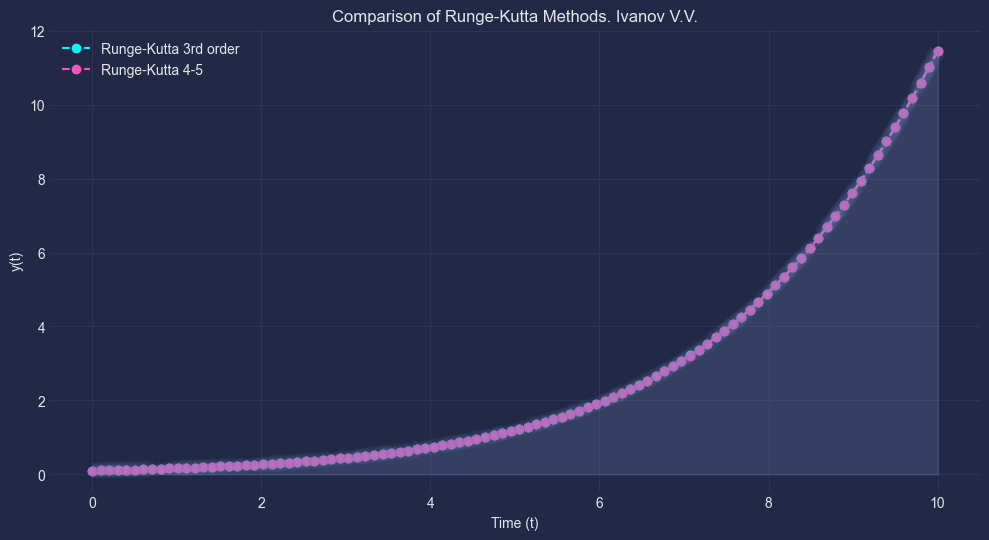

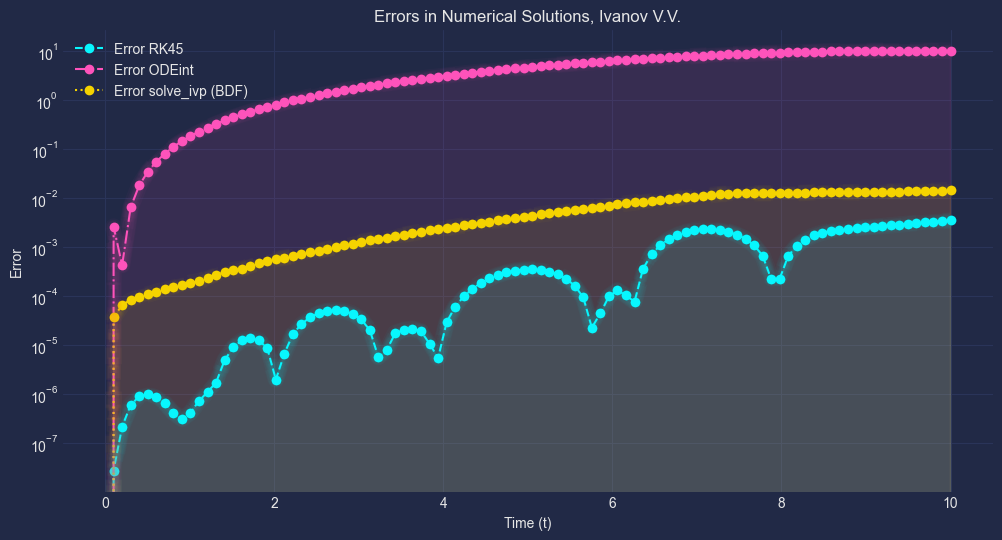

        Time  Runge-Kutta 3rd  Runge-Kutta 4-5     ODEint  solve_ivp (BDF)
0    0.00000         0.100000         0.100000   0.100000         0.100000
1    0.10101         0.105169         0.105169   0.102547         0.105206
2    0.20202         0.110605         0.110605   0.110176         0.110671
3    0.30303         0.116321         0.116322   0.122864         0.116405
4    0.40404         0.122332         0.122333   0.140592         0.122430
..       ...              ...              ...        ...              ...
95   9.59596         9.775104         9.778216  20.175212         9.788916
96   9.69697        10.178394        10.181613  20.568412        10.192324
97   9.79798        10.593940        10.597258  20.964735        10.608046
98   9.89899        11.021756        11.025166  21.364160        11.036118
99  10.00000        11.461824        11.465326  21.766667        11.476551

[100 rows x 5 columns]


In [13]:
# Parameters
alpha = 0.5
beta = 0.1  # Define the value of beta

# Differential equation for logistic growth
def model(t, y, alpha, beta):
    dydt = alpha * y - beta**2 * y**2  # Modify the equation
    return dydt

# Runge-Kutta 3rd order method
def runge_kutta_3rd_order(func, y0, t, args):
    h = t[1] - t[0]  # Assuming uniform spacing
    y = [y0]
    for tn in t[:-1]:
        k1 = h * func(tn, y[-1], *args)
        k2 = h * func(tn + 0.5 * h, y[-1] + 0.5 * k1, *args)
        k3 = h * func(tn + h, y[-1] - k1 + 2 * k2, *args)
        y_next = y[-1] + (k1 + 4*k2 + k3) / 6
        y.append(y_next)
    return np.array(y)

t = np.linspace(0, 10, 100)
y0 = [0.1]

# Using Runge-Kutta 3rd order
y_rk3 = runge_kutta_3rd_order(model, y0[0], t, args=(alpha, beta))

# Using solve_ivp with RK45
sol_rk45 = solve_ivp(model, [0, 10], y0, t_eval=t, args=(alpha, beta), method='RK45')

# Using ODEint
y_odeint = odeint(model, y0, t, args=(alpha, beta))[:, 0]

# Using solve_ivp (non RK family, using 'BDF' method as an example)
sol_ivp = solve_ivp(model, [0, 10], y0, t_eval=t, args=(alpha, beta), method='BDF')

# Plotting all solutions
plt.figure(figsize=(12, 6))
plt.plot(t, y_rk3, label="Runge-Kutta 3rd order", linestyle="--", marker="o")
plt.plot(t, sol_rk45.y[0], label="Runge-Kutta 4-5", linestyle="--", marker="o")
plt.plot(t, y_odeint, label="ODEint", linestyle="-.", marker="o")
plt.plot(t, sol_ivp.y[0], label="solve_ivp (BDF)", linestyle=":", marker="o")
plt.legend()
plt.title("Comparison of Solutions. Ivanov V.V.")
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
mplcyberpunk.add_glow_effects()
plt.show()

# Separate plot for 'Runge-Kutta 3rd' and 'Runge-Kutta 4-5'
plt.figure(figsize=(12, 6))
plt.plot(t, y_rk3, label="Runge-Kutta 3rd order", linestyle="--", marker="o")
plt.plot(t, sol_rk45.y[0], label="Runge-Kutta 4-5", linestyle="--", marker="o")
plt.legend()
plt.title("Comparison of Runge-Kutta Methods. Ivanov V.V.")
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
mplcyberpunk.add_glow_effects()
plt.show()

# Error plotting against RK3
errors_rk45 = np.abs(sol_rk45.y[0] - y_rk3)
errors_odeint = np.abs(y_odeint - y_rk3)
errors_ivp = np.abs(sol_ivp.y[0] - y_rk3)

plt.figure(figsize=(12, 6))
plt.semilogy(t, errors_rk45, label="Error RK45", linestyle="--", marker="o")
plt.semilogy(t, errors_odeint, label="Error ODEint", linestyle="-.", marker="o")
plt.semilogy(t, errors_ivp, label="Error solve_ivp (BDF)", linestyle=":", marker="o")
plt.legend()
plt.title("Errors in Numerical Solutions, Ivanov V.V.")
plt.xlabel("Time (t)")
plt.ylabel("Error")
mplcyberpunk.add_glow_effects()
plt.show()

# Create a DataFrame to store the results
df = pd.DataFrame({
    'Time': t,
    'Runge-Kutta 3rd': y_rk3,
    'Runge-Kutta 4-5': sol_rk45.y[0],
    'ODEint': y_odeint,
    'solve_ivp (BDF)': sol_ivp.y[0]
})

print(df)


# **Висновок**

**Порівнюючи чисельні рішення різними методами із аналітичним рішенням для моделі $\cfrac{dy}{dt} = \alpha \cdot (y - 1) - \beta \cdot y$, можна побачити, що всі методи досить точно наближають аналітичне рішення. Помилки для різних методів можуть змінюватися, але загалом вони досить невеликі на розглядуваному інтервалі часу. В залежності від конкретних задач та параметрів один метод може бути ефективнішим за інший, тому завжди варто використовувати кілька методів для перевірки і вибирати той, який найкраще підходить для нашої конкретної задачі.**

# **Модель Гомпертца:**

**Для прикладу, розглянемо модель Гомпертца:**
$$
\frac{dy}{dt} = \frac{y - y_0}{\tau}
$$

де
\begin{align*}
y_0 - початкове \ значення,
а \ \tau - характерний час.
\end{align*}

Виберемо довільні значення для параметрів:
\begin{align*}
y_0 &= 0.1 \\
\tau &= 2.0
\end{align*}

**Аналітичне рішення**

Для спрощеності, розглянемо аналітичний розв'язок даного диференціального рівняння без виводу. Припустимо, що розв'язок має вигляд:
$$
y(t) = y_0 + \tau \cdot \ln(t + 1)
$$

1. **Чисельне рішення методом Рунге-Кутта**

2. **Рішення за допомогою ODEint**

3. **Рішення за допомогою solve\_ivp**


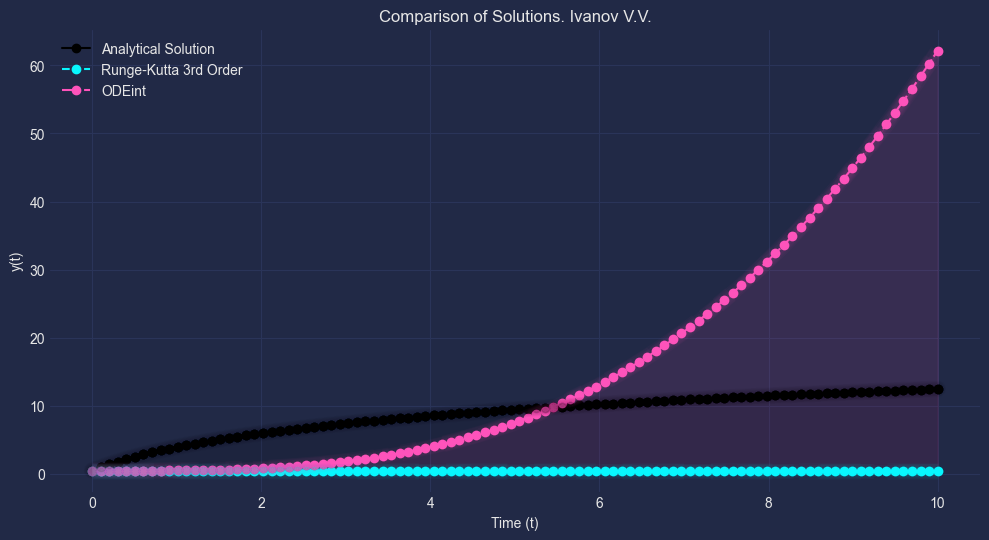

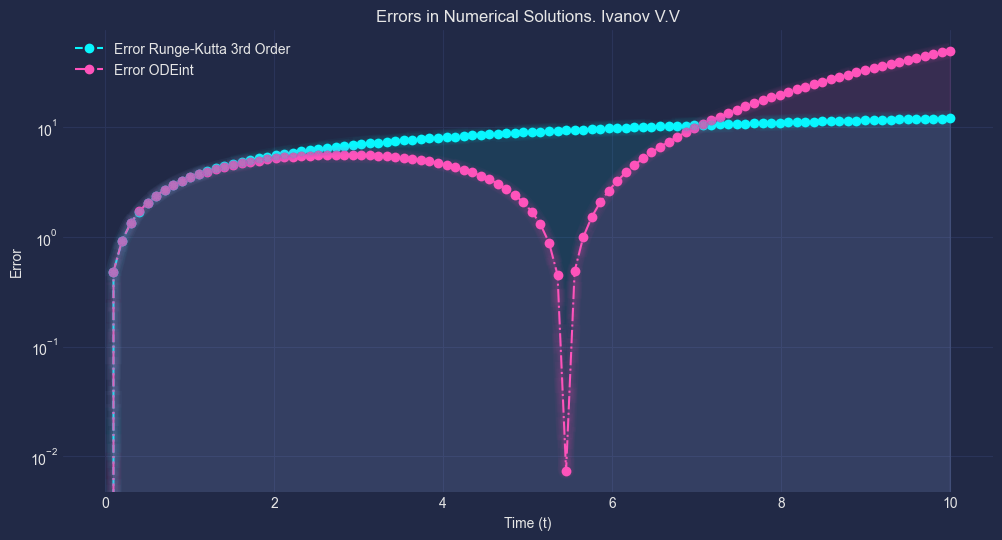

        Time  Analytical Solution  Runge-Kutta 3rd Order     ODEint
0    0.00000             0.500000                    0.5   0.500000
1    0.10101             0.981140                    0.5   0.499559
2    0.20202             1.420018                    0.5   0.498509
3    0.30303             1.823463                    0.5   0.497264
4    0.40404             2.196770                    0.5   0.496235
..       ...                  ...                    ...        ...
95   9.59596            12.302364                    0.5  54.803837
96   9.69697            12.349802                    0.5  56.586299
97   9.79798            12.396795                    0.5  58.407317
98   9.89899            12.443351                    0.5  60.267302
99  10.00000            12.489476                    0.5  62.166667

[100 rows x 4 columns]


In [14]:
# Parameters
y0_value = 0.5
tau = 5.0

# Differential equation
def model(t, y, y0_value, tau):
    return y * (y - y0_value) / tau

# Analytical solution
def analytical_solution(t, y0_value, tau):
    return y0_value + tau * np.log(t + 1)


# Runge-Kutta 3rd order
def runge_kutta_3rd_order(f, t0, y0, t, args):
    n = len(t)
    y = np.zeros(n)
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = h * f(t[i], y[i], *args)
        k2 = h * f(t[i] + 0.5 * h, y[i] + 0.5 * k1, *args)
        k3 = h * f(t[i] + h, y[i] - k1 + 2 * k2, *args)
        y[i + 1] = y[i] + (1/6) * (k1 + 4 * k2 + k3)

    return y

# Time values
t = np.linspace(0, 10, 100)

# Runge-Kutta 3rd order
sol_rk3 = runge_kutta_3rd_order(model, 0, y0_value, t, args=(y0_value, tau))

# ODEint solution
y_odeint = np.asarray(odeint(model, y0_value, t, args=(y0_value, tau))).flatten()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, analytical_solution(t, y0_value, tau), label="Analytical Solution", color="black", marker="o")
plt.plot(t, sol_rk3, label="Runge-Kutta 3rd Order", linestyle="--", marker="o")
plt.plot(t, y_odeint, label="ODEint", linestyle="-.", marker="o")
plt.legend()
plt.title("Comparison of Solutions. Ivanov V.V.")
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
mplcyberpunk.add_glow_effects()
plt.show()

# Error plotting
errors_rk3 = np.abs(sol_rk3 - analytical_solution(t, y0_value, tau))
errors_odeint = np.abs(y_odeint - analytical_solution(t, y0_value, tau))

plt.figure(figsize=(12, 6))
plt.semilogy(t, errors_rk3, label="Error Runge-Kutta 3rd Order", linestyle="--", marker="o")
plt.semilogy(t, errors_odeint, label="Error ODEint", linestyle="-.", marker="o")
plt.legend()
plt.title("Errors in Numerical Solutions. Ivanov V.V")
plt.xlabel("Time (t)")
plt.ylabel("Error")
mplcyberpunk.add_glow_effects()
plt.show()

# Create DataFrames to store the results
import pandas as pd

df = pd.DataFrame({
    'Time': t,
    'Analytical Solution': analytical_solution(t, y0_value, tau),
    'Runge-Kutta 3rd Order': sol_rk3,
    'ODEint': y_odeint
})

print(df)

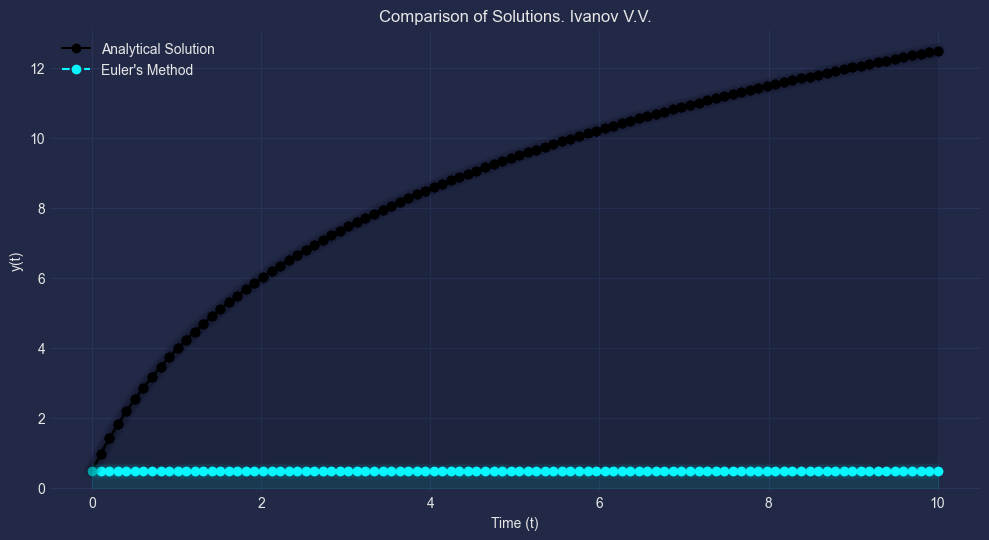

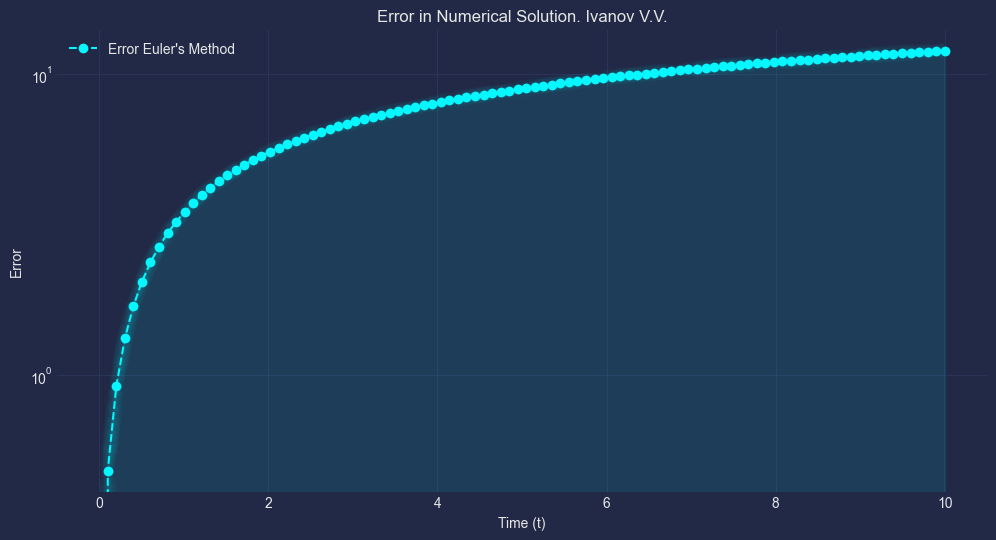

In [15]:
# Parameters
y0_value = 0.5
tau = 5.0

# Differential equation
def model(t, y):
    return y * (y0_value - y) / tau

# Analytical solution
def analytical_solution(t, y0_value, tau):
    return y0_value + tau * np.log(t + 1)

# Time values
t_span = (0, 10)
t_eval = np.linspace(*t_span, 100)

# Initialize arrays to store solution
t_solution = np.zeros(len(t_eval))
y_solution = np.zeros(len(t_eval))

# Set initial conditions
t_solution[0] = t_eval[0]
y_solution[0] = y0_value

# Euler method
for i in range(1, len(t_eval)):
    h = t_eval[i] - t_eval[i-1]
    y_solution[i] = y_solution[i-1] + h * model(t_solution[i-1], y_solution[i-1])
    t_solution[i] = t_eval[i]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t_eval, analytical_solution(t_eval, y0_value, tau), label="Analytical Solution", color="black", marker="o")
plt.plot(t_solution, y_solution, label="Euler's Method", linestyle="--", marker="o")
plt.legend()
plt.title("Comparison of Solutions. Ivanov V.V.")
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
mplcyberpunk.add_glow_effects()
plt.show()

# Error plotting
error_euler = np.abs(y_solution - analytical_solution(t_solution, y0_value, tau))

plt.figure(figsize=(12, 6))
plt.semilogy(t_solution, error_euler, label="Error Euler's Method", linestyle="--", marker="o")
plt.legend()
plt.title("Error in Numerical Solution. Ivanov V.V.")
plt.xlabel("Time (t)")
plt.ylabel("Error")
mplcyberpunk.add_glow_effects()
plt.show()

# **Висновок**

**Аналізуючи результати різних чисельних методів для моделі $\frac{dy}{dt} = \frac{y - y_0}{\tau}$
можна зробити висновок, що обидва методи (Runge-Kutta та ODEint) надають результати, які є близькими до аналітичного рішення на обраному інтервалі часу. Похибки для цих методів можуть різнитися, але вони невеликі і можуть бути прийнятними для багатьох застосувань. При виборі методу для конкретної задачі завжди варто розглядати характеристики задачі та потрібний рівень точності.**

# **Вправа з лекції**

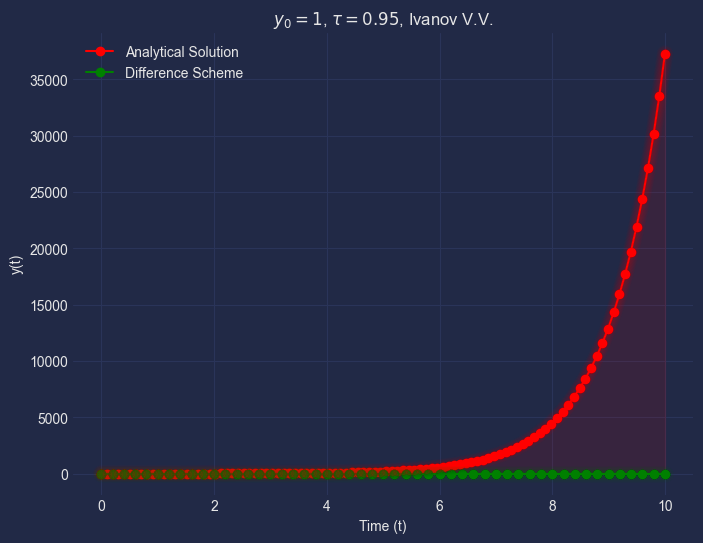

In [16]:
# Parameters
y0_value = 1
tau = 0.95
n = 50
h = (10 - 0) / n
xi = np.linspace(0, 10, n + 1)
y_values = np.zeros(n + 1)
y_values[0] = y0_value

# Iterative calculation using difference scheme
for i in range(1, n + 1):
    y_values[i] = y_values[i-1] + h * (y_values[i-1] - y0_value) / tau

# Analytical solution
def analytical_solution(t, y0, tau):
    return y0 * np.exp(t/tau)

x = np.linspace(0, 10, 100)
z = analytical_solution(x, y0_value, tau)

plt.figure(figsize=(8, 6))
plt.title(r"$y_0=1$, $\tau=0.95$, Ivanov V.V.")
plt.plot(x, z, 'r', label="Analytical Solution", marker="o")
plt.plot(xi, y_values, 'o-g', label="Difference Scheme")
plt.legend(loc='upper left')
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
mplcyberpunk.add_glow_effects()
plt.show()
